## Data Project --Cleaning in Python

In [1]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
os.getcwd() #gives current working directoy for this sheet

'/Users/ashleyhooper/Documents/GitHub/OnlineCourses/pandas_Boris'

In [3]:
os.chdir('/Users/ashleyhooper/Documents/GitHub') #changes working directoy for this sheet

In [4]:
df = pd.read_csv('/Users/ashleyhooper/Documents/GitHub/CovidFB/overall-state-smoothed.csv', parse_dates = ['date'],
                 infer_datetime_format= True)

In [5]:
df.dtypes

date                                                 datetime64[ns]
state_code                                                   object
gender                                                       object
age_bucket                                                   object
summed_n                                                      int64
                                                          ...      
smoothed_pct_chronic_lung_disease_weighted                  float64
smoothed_pct_kidney_disease_weighted                        float64
smoothed_pct_autoimmune_disorder_weighted                   float64
smoothed_pct_no_above_medical_conditions_weighted           float64
smoothed_pct_multiple_medical_conditions_weighted           float64
Length: 103, dtype: object

In [6]:
pd.set_option('precision', 1)
df.describe(include='all', datetime_is_numeric=True)

,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
count,93277,93277,93277,93277,93277.0,93277.0,93277.0,93277.0,93277.0,87775.0,...,93277.0,93277.0,93277.0,93277.0,93277.0,93277.0,93277.0,93277.0,93277.0,93277.0
unique,NaN,59,3,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,mi,overall,overall,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1840,31192,23483,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2020-06-26 15:14:35.212539136,NaN,NaN,NaN,2656.3,0.6,0.6,1.6,0.9,15.0,...,11.1,4.9,5.9,29.0,15.2,4.2,2.2,6.6,49.8,19.8
min,2020-04-12 00:00:00,NaN,NaN,NaN,50.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.0,-0.0,0.6,1.6,0.0,-0.0,0.0,9.3,-0.0
25%,2020-05-20 00:00:00,NaN,NaN,NaN,600.0,0.3,0.3,1.0,0.6,10.0,...,4.6,1.3,1.6,16.2,12.4,1.0,0.9,3.8,39.0,9.2
50%,2020-06-27 00:00:00,NaN,NaN,NaN,1398.0,0.5,0.5,1.4,0.8,13.8,...,10.9,4.2,4.3,28.6,15.3,3.5,1.9,6.2,50.3,18.9
75%,2020-08-04 00:00:00,NaN,NaN,NaN,3065.0,0.8,0.8,2.0,1.2,18.8,...,14.9,7.2,8.7,40.1,17.9,6.5,3.1,9.1,61.3,28.5
max,2020-09-12 00:00:00,NaN,NaN,NaN,45877.0,4.4,4.8,7.0,6.5,45.3,...,34.9,20.5,26.6,70.4,33.5,20.9,15.6,22.1,87.9,53.3


In [7]:
#Remove unnecessary data categories
df.drop(df.loc[df['state_code'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'pr'])].index , inplace=True)
df.drop(df.loc[df['gender'].isin(['overall'])].index , inplace=True)
df.drop(df.loc[df['age_bucket'].isin(['overall'])].index , inplace=True)

In [8]:
#df = df.set_index(['date', 'state_code'])

In [9]:
#df.sort_index(inplace=True)

In [10]:
df.sort_values(['gender', 'age_bucket'])

,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
669,2020-08-28,ak,female,18-34,135,1.5,1.5,3.0,1.5,23.7,...,0.6,0.0,1.5,5.3,16.2,0.0,0.8,5.5,74.9,4.9
670,2020-08-27,ak,female,18-34,119,1.7,1.7,3.4,1.7,22.9,...,0.7,0.0,1.7,4.6,15.4,0.0,0.9,4.7,74.9,3.3
671,2020-08-26,ak,female,18-34,104,1.0,1.0,1.9,1.9,21.2,...,0.8,0.0,2.0,5.3,14.4,0.0,0.0,3.6,76.3,2.7
672,2020-08-25,ak,female,18-34,103,0.0,0.0,1.0,0.0,20.4,...,2.8,0.0,3.0,6.8,15.5,0.0,0.0,5.1,71.8,4.3
673,2020-08-24,ak,female,18-34,111,0.9,0.9,1.9,0.9,20.9,...,2.6,0.0,2.8,8.0,15.3,0.9,0.0,7.4,68.8,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92507,2020-04-16,wy,male,55+,124,3.3,3.3,5.8,2.4,NaN,...,19.4,14.5,18.6,48.4,13.7,12.0,4.0,5.5,22.8,41.0
92508,2020-04-15,wy,male,55+,150,2.0,2.0,4.1,2.0,NaN,...,24.1,13.5,17.9,50.4,10.2,10.4,5.1,6.4,22.4,37.9
92509,2020-04-14,wy,male,55+,191,1.6,1.6,3.2,2.1,NaN,...,26.8,10.6,18.7,48.9,11.6,11.4,4.0,7.0,22.0,39.5
92510,2020-04-13,wy,male,55+,212,1.0,1.0,2.0,1.4,NaN,...,25.8,7.4,18.7,54.7,11.3,11.6,3.6,6.3,22.9,38.1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46129 entries, 669 to 92511
Columns: 103 entries, date to smoothed_pct_multiple_medical_conditions_weighted
dtypes: datetime64[ns](1), float64(98), int64(1), object(3)
memory usage: 36.6+ MB


<AxesSubplot:xlabel='age_bucket', ylabel='count'>

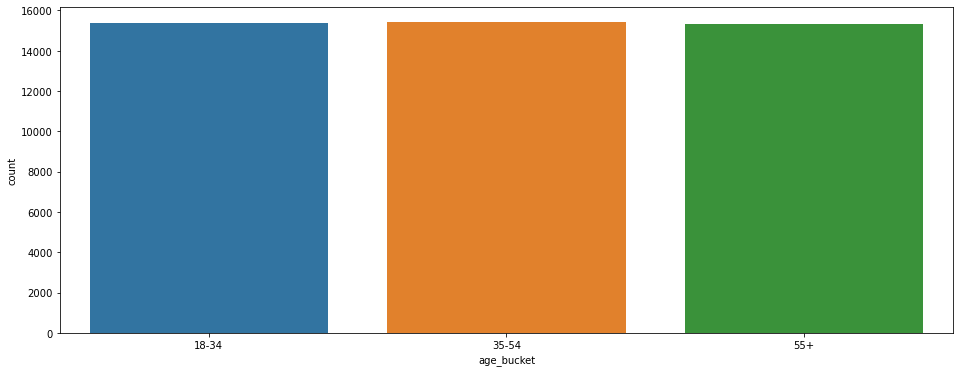

In [12]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'age_bucket' , data = df)

<AxesSubplot:xlabel='state_code', ylabel='count'>

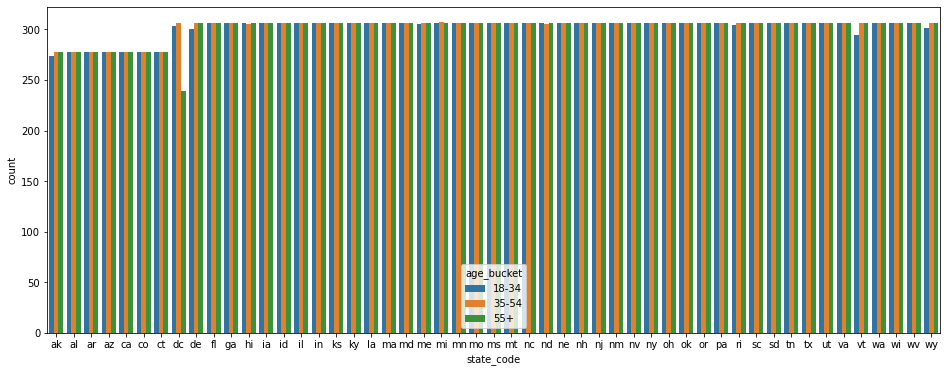

In [13]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'state_code', hue = 'age_bucket' , data = df)

/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smoothed_pct_cli', ylabel='Density'>

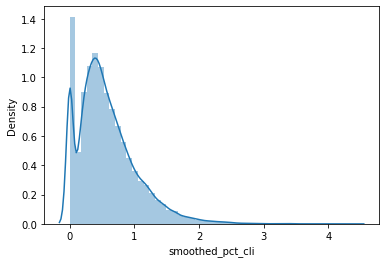

In [14]:
sns.distplot(df['smoothed_pct_cli'])

/anaconda2/envs/py3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='smoothed_pct_could_not_get_tested', ylabel='Density'>

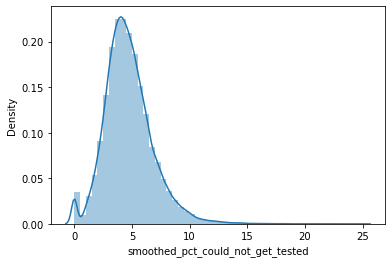

In [15]:
sns.distplot(df['smoothed_pct_could_not_get_tested'])

<AxesSubplot:xlabel='state_code', ylabel='smoothed_pct_cli'>

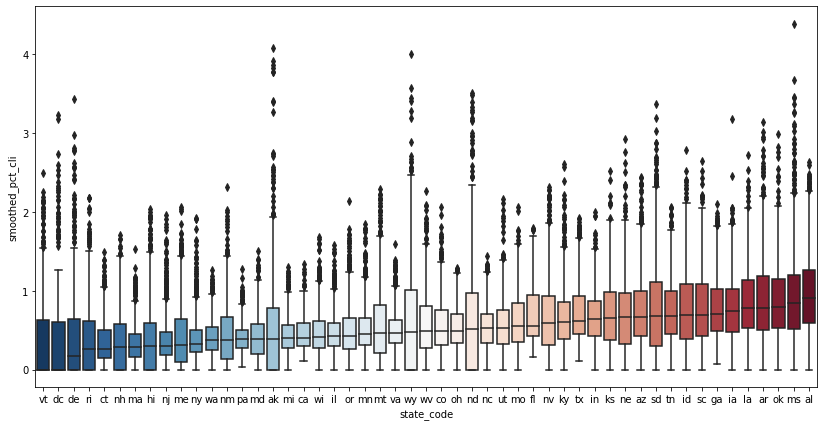

In [16]:
result = df.groupby(['state_code'])['smoothed_pct_cli'].aggregate(np.median).reset_index().sort_values('smoothed_pct_cli')
plt.figure(figsize=(14,7))
sns.boxplot(x='state_code', y='smoothed_pct_cli', data=df, order = result['state_code'], palette = 'RdBu_r')

### Explore missing data

<AxesSubplot:>

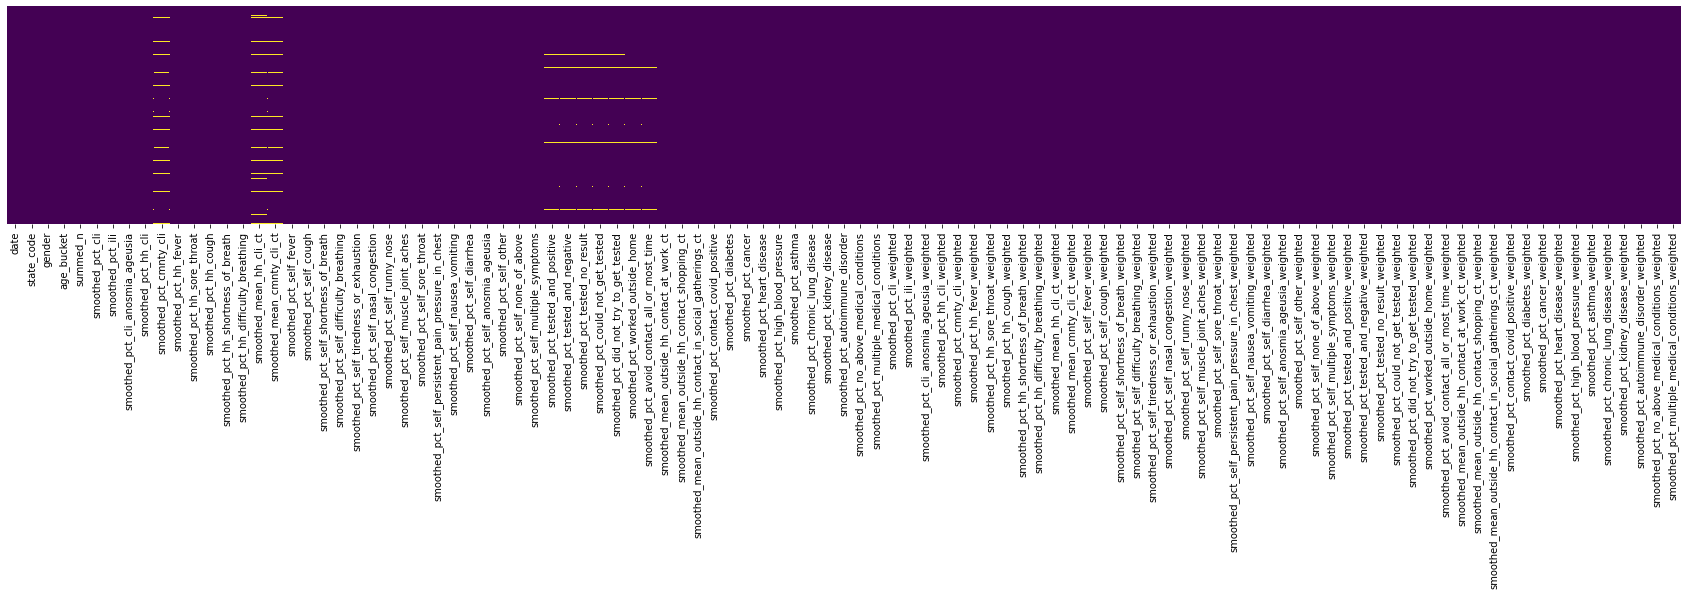

In [17]:
plt.figure(figsize=(30,4))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
null_data = df[df.isnull().any(axis=1)]

In [20]:
null_data

,date,state_code,gender,age_bucket,summed_n,smoothed_pct_cli,smoothed_pct_ili,smoothed_pct_cli_anosmia_ageusia,smoothed_pct_hh_cli,smoothed_pct_cmnty_cli,...,smoothed_pct_diabetes_weighted,smoothed_pct_cancer_weighted,smoothed_pct_heart_disease_weighted,smoothed_pct_high_blood_pressure_weighted,smoothed_pct_asthma_weighted,smoothed_pct_chronic_lung_disease_weighted,smoothed_pct_kidney_disease_weighted,smoothed_pct_autoimmune_disorder_weighted,smoothed_pct_no_above_medical_conditions_weighted,smoothed_pct_multiple_medical_conditions_weighted
798,2020-04-21,ak,female,18-34,162,0.6,0.6,2.5,0.6,20.1,...,4.6,0.9,0.5,11.9,28.8,0.0,0.0,8.4,56.5,10.9
799,2020-04-20,ak,female,18-34,188,1.1,1.1,2.7,1.6,NaN,...,1.7,1.2,0.5,10.9,29.8,0.4,0.0,7.7,57.5,9.6
800,2020-04-19,ak,female,18-34,221,0.9,0.9,1.8,1.4,NaN,...,0.6,0.7,0.4,10.0,27.7,0.4,0.0,5.7,61.5,7.0
801,2020-04-18,ak,female,18-34,203,1.0,1.0,2.0,1.5,NaN,...,1.2,0.8,0.4,10.5,28.8,0.4,0.0,5.8,59.1,7.0
802,2020-04-17,ak,female,18-34,215,0.9,1.4,2.4,1.4,NaN,...,1.5,0.8,0.4,9.2,28.1,0.4,0.4,5.4,60.4,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92507,2020-04-16,wy,male,55+,124,3.3,3.3,5.8,2.4,NaN,...,19.4,14.5,18.6,48.4,13.7,12.0,4.0,5.5,22.8,41.0
92508,2020-04-15,wy,male,55+,150,2.0,2.0,4.1,2.0,NaN,...,24.1,13.5,17.9,50.4,10.2,10.4,5.1,6.4,22.4,37.9
92509,2020-04-14,wy,male,55+,191,1.6,1.6,3.2,2.1,NaN,...,26.8,10.6,18.7,48.9,11.6,11.4,4.0,7.0,22.0,39.5
92510,2020-04-13,wy,male,55+,212,1.0,1.0,2.0,1.4,NaN,...,25.8,7.4,18.7,54.7,11.3,11.6,3.6,6.3,22.9,38.1


<AxesSubplot:>

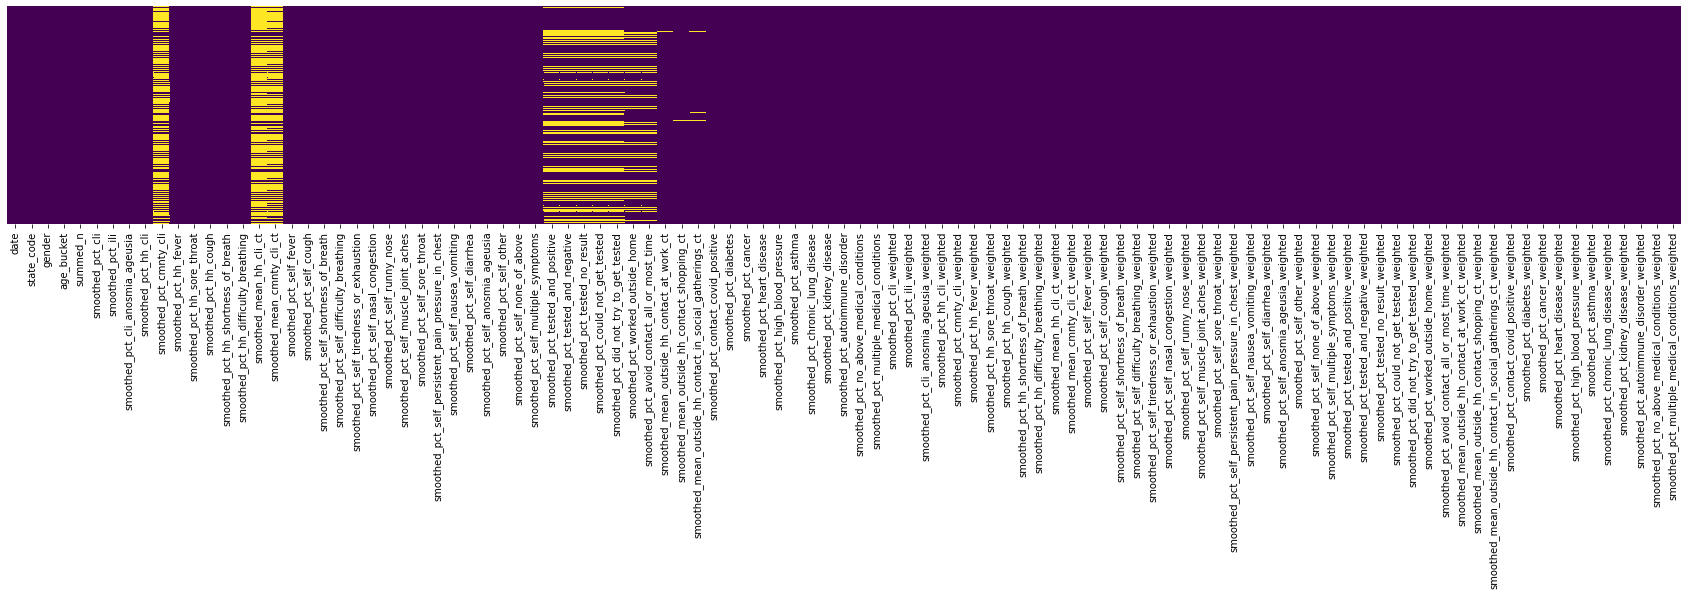

In [21]:
plt.figure(figsize=(30,4))
sns.heatmap(null_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='state_code', ylabel='smoothed_pct_cli'>

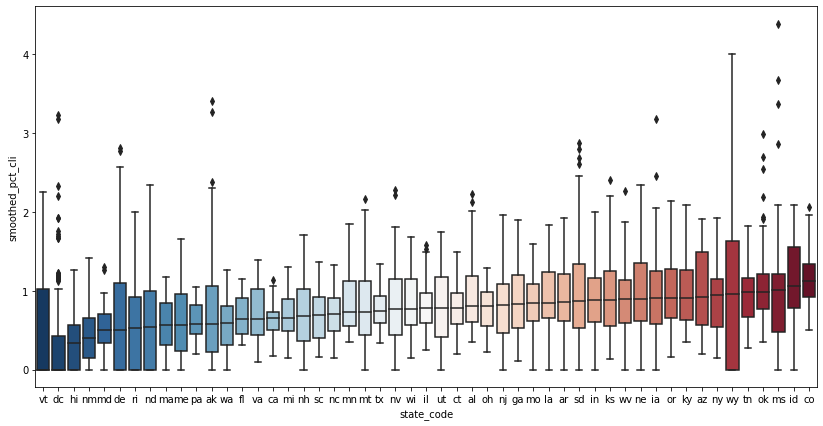

In [22]:
result = null_data.groupby(['state_code'])['smoothed_pct_cli'].aggregate(np.median).reset_index().sort_values('smoothed_pct_cli')
plt.figure(figsize=(14,7))
sns.boxplot(x='state_code', y='smoothed_pct_cli', data=null_data, order = result['state_code'], palette = 'RdBu_r')

<AxesSubplot:xlabel='state_code', ylabel='count'>

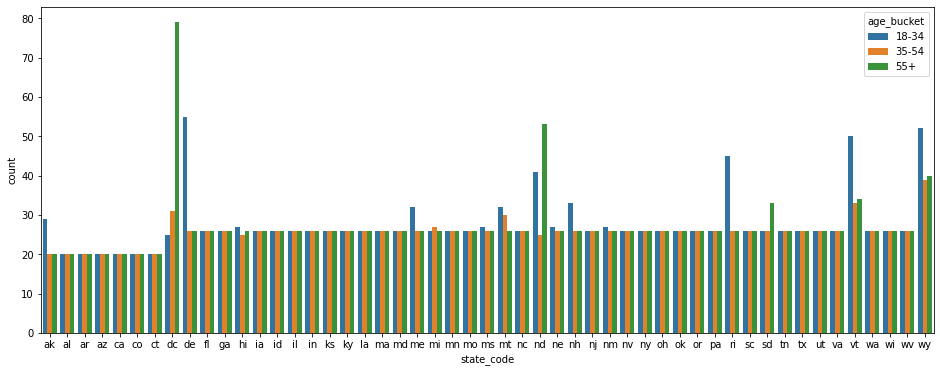

In [23]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'state_code', hue = 'age_bucket' , data = null_data)

<AxesSubplot:xlabel='age_bucket', ylabel='count'>

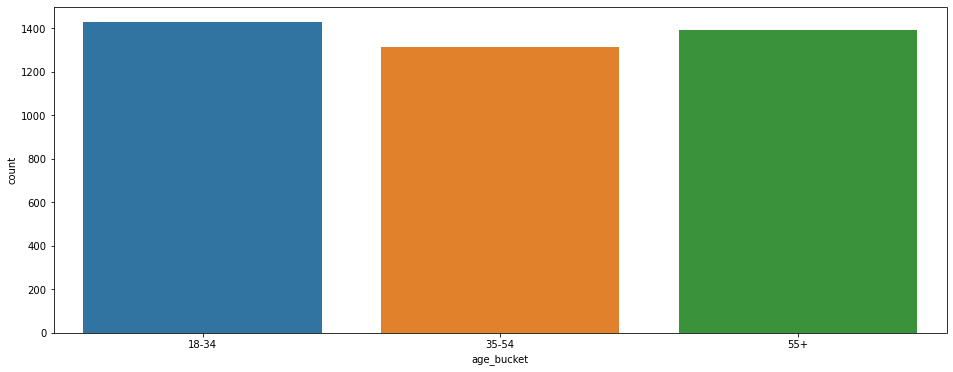

In [24]:
plt.figure(figsize=(16, 6))
sns.countplot(x = 'age_bucket' , data = null_data)

[Text(0, 0, '2020-08-28T00:00:00.000000000'),
 Text(1, 0, '2020-08-27T00:00:00.000000000'),
 Text(2, 0, '2020-08-26T00:00:00.000000000'),
 Text(3, 0, '2020-08-25T00:00:00.000000000'),
 Text(4, 0, '2020-08-24T00:00:00.000000000'),
 Text(5, 0, '2020-08-23T00:00:00.000000000'),
 Text(6, 0, '2020-08-22T00:00:00.000000000'),
 Text(7, 0, '2020-08-21T00:00:00.000000000'),
 Text(8, 0, '2020-08-20T00:00:00.000000000'),
 Text(9, 0, '2020-08-19T00:00:00.000000000'),
 Text(10, 0, '2020-08-18T00:00:00.000000000'),
 Text(11, 0, '2020-08-17T00:00:00.000000000'),
 Text(12, 0, '2020-08-16T00:00:00.000000000'),
 Text(13, 0, '2020-08-15T00:00:00.000000000'),
 Text(14, 0, '2020-08-14T00:00:00.000000000'),
 Text(15, 0, '2020-08-13T00:00:00.000000000'),
 Text(16, 0, '2020-08-12T00:00:00.000000000'),
 Text(17, 0, '2020-08-11T00:00:00.000000000'),
 Text(18, 0, '2020-08-10T00:00:00.000000000'),
 Text(19, 0, '2020-08-09T00:00:00.000000000'),
 Text(20, 0, '2020-08-08T00:00:00.000000000'),
 Text(21, 0, '2020-08-0

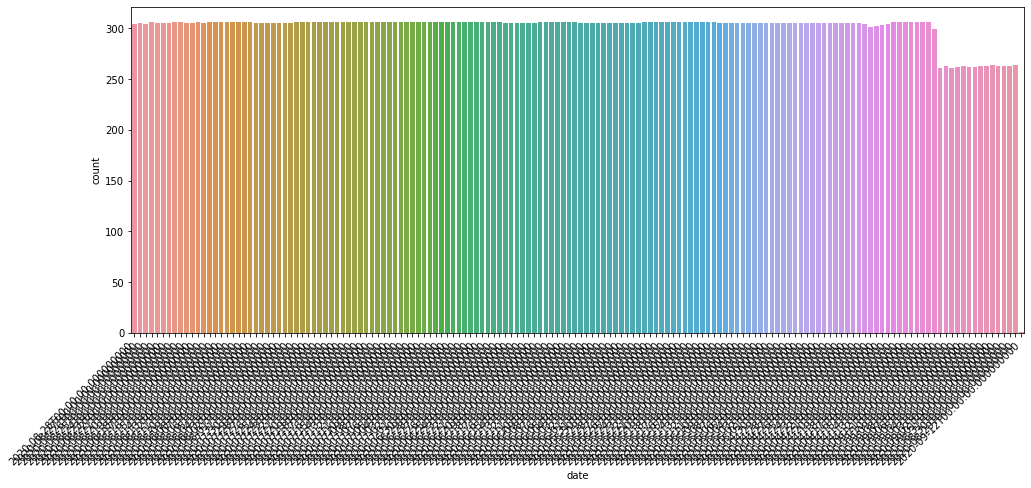

In [29]:
plt.figure(figsize=(16, 6))
chart = sns.countplot(x = 'date' , data = df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')